<a href="https://colab.research.google.com/github/wahyudi0018/PCVK_Ganjil_2024/blob/main/Modul3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Wahyudi**

**Kelas : TI-3C**

**No. Absen : 26**

# Praktikum

## Praktikum 1: Mengubah tingkat kecerahan citra

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 50


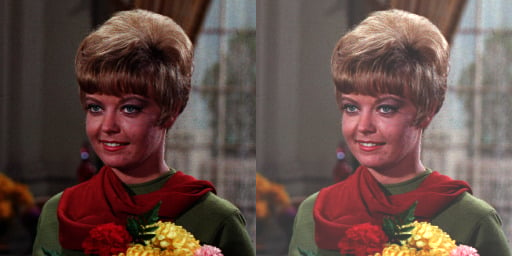

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))

except ValueError:
  print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
# brightness_image = cv.convertScaleAbs(original,beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

# Tugas

## Tugas 1: Pembalikkan Citra

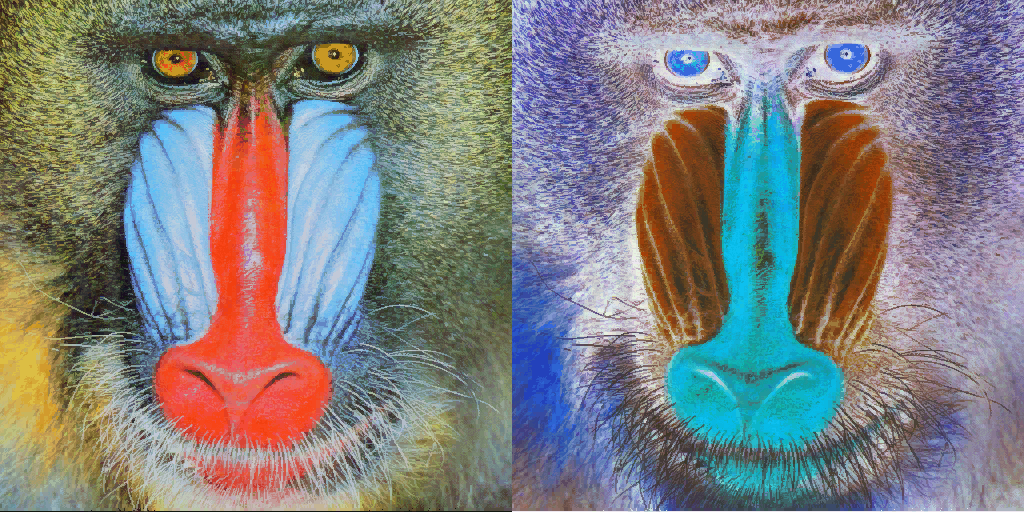

In [21]:
mandrill = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
inverse_image = np.zeros(mandrill.shape, mandrill.dtype)

#akses per pixel
for y in range(mandrill.shape[0]):  # Loop melalui tiap baris piksel
    for x in range(mandrill.shape[1]):  # Loop melalui tiap kolom piksel
        for c in range(mandrill.shape[2]):  # Loop melalui tiap kanal warna (B, G, R)
            inverse_image[y, x, c] = 255 - mandrill[y, x, c]  # Melakukan operasi inversi

#cara simpel tanpa for loop
# inverse_image = 255 - mandrill

final_frame = cv.hconcat((mandrill, inverse_image))
cv2_imshow(final_frame)

## Tugas 2: Mengubah kontras dan tingkat kecerahan citra

Mengubah kontras dan tingkat kecerahan citra
-------------------------------------------
Masukkan nilai kecerahan [-255 - 255] : 60
Masukkan nilai kontras [1.0 - 3.0] : 1.5


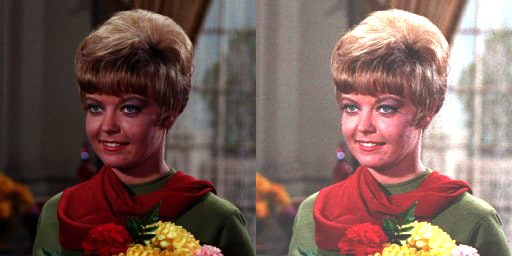

In [2]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('-------------------------------------------')

try:
    # Meminta input dari pengguna untuk tingkat kecerahan dan kontras
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255] : '))
    contrast = float(input('Masukkan nilai kontras [1.0 - 3.0] : '))

    # Validasi rentang input
    if not (-255 <= brightness <= 255):
        raise ValueError("Nilai kecerahan harus dalam rentang [-255 - 255]")
    if not (1.0 <= contrast <= 3.0):
        raise ValueError("Nilai kontras harus dalam rentang [1.0 - 3.0]")

except ValueError as ve:
    print('Error:', ve)
    exit()

female1 = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
adjusted_image = np.zeros(female1.shape, female1.dtype)

#akses per pixel
for y in range(female1.shape[0]):  # Loop untuk setiap baris piksel
    for x in range(female1.shape[1]):  # Loop untuk setiap kolom piksel
        for c in range(female1.shape[2]):  # Loop untuk setiap kanal warna (B, G, R)
            # Menghitung piksel baru berdasarkan kontras dan kecerahan
            adjusted_value = female1[y, x, c] * contrast + brightness
            # Memastikan nilai piksel berada dalam rentang [0, 255]
            adjusted_image[y, x, c] = np.clip(adjusted_value, 0, 255)

#cara simpel tanpa for loop
# adjusted_image = cv.convertScaleAbs(female1, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((female1, adjusted_image))
cv2_imshow(final_frame)

## Tugas 3: Mengubah tingkat kecerahan citra dengan transformasi logartima

Mengubah tingkat kecerahan citra dengan transformasi logaritma
-------------------------------------------------------------
Masukkan nilai kecerahan: 40


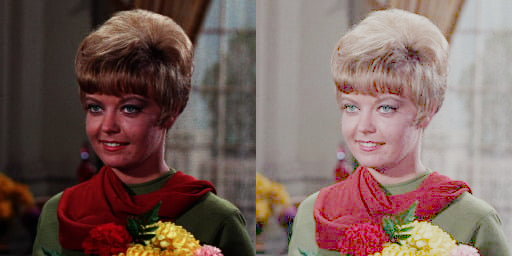

In [13]:
print('Mengubah tingkat kecerahan citra dengan transformasi logaritma')
print('-------------------------------------------------------------')

# Meminta input dari pengguna untuk nilai kecerahan
brilog = float(input('Masukkan nilai kecerahan: '))

female2 = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brilog_image = np.zeros(female2.shape, female2.dtype)

#akses per pixel
for y in range(female2.shape[0]):  # Loop untuk setiap baris piksel
    for x in range(female2.shape[1]):  # Loop untuk setiap kolom piksel
        for c in range(female2.shape[2]):  # Loop untuk setiap kanal warna (B, G, R)
            # Menghitung piksel baru berdasarkan transformasi logaritma
            brilog_value = brilog * np.log1p(female2[y, x, c])
            # Memastikan nilai piksel berada dalam rentang [0, 255]
            brilog_image[y, x, c] = np.clip(brilog_value, 0, 255)

#cara simpel tanpa for loop
# brilog_image = brilog * np.log1p(female2)
# brilog_image = np.clip(brilog_image, 0, 255).astype(np.uint8)

final_frame = cv.hconcat((female2, brilog_image))
cv2_imshow(final_frame)

## Tugas 4: Implementasikan transformasi grayscale

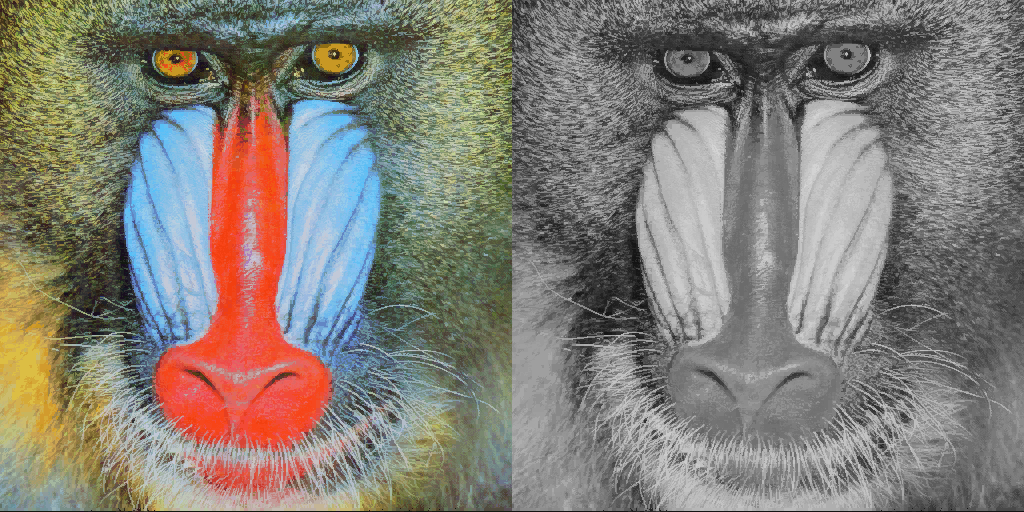

In [22]:
#metode Averaging
mandrill = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
averaging_image = np.zeros((mandrill.shape[0], mandrill.shape[1]), np.uint8)

#akses per pixel
for y in range(mandrill.shape[0]):  # Loop melalui tiap baris piksel
    for x in range(mandrill.shape[1]):  # Loop melalui tiap kolom piksel
        # Menghitung nilai rata-rata dari setiap kanal warna
        gray_value = np.mean(mandrill[y, x])
        averaging_image[y, x] = gray_value

#cara simpel tanpa for loop
# averaging_image = np.mean(mandrill, axis=2).astype(np.uint8)

final_frame = cv.hconcat((mandrill, cv.cvtColor(averaging_image, cv.COLOR_GRAY2BGR)))
cv2_imshow(final_frame)

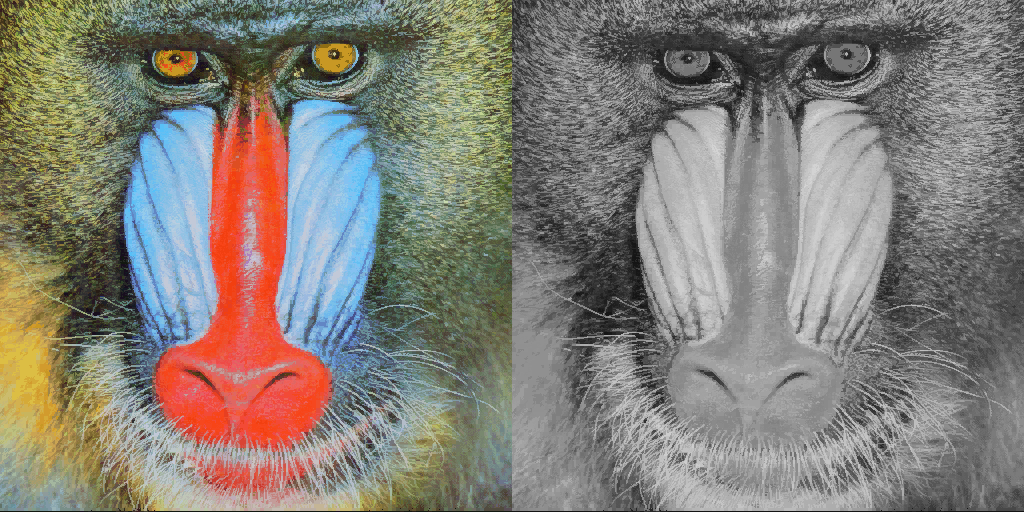

In [43]:
#metode Lightness
mandrill = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
lightness_image = np.zeros((mandrill.shape[0], mandrill.shape[1]), np.uint8)

#akses per pixel
for y in range(mandrill.shape[0]):  # Loop melalui tiap baris piksel
    for x in range(mandrill.shape[1]):  # Loop melalui tiap kolom piksel
        # Menghitung nilai lightness dengan rumus
        # Lightness = (max(R, G, B) + min(R, G, B)) / 2
        pixel = mandrill[y, x].astype(float)  # Konversi ke float
        max_val = np.max(pixel)
        min_val = np.min(pixel)
        gray_value = (max_val + min_val) / 2
        lightness_image[y, x] = np.clip(gray_value, 0, 255).astype(np.uint8)  # Clip ke rentang 0-255

#cara simpel tanpa for loop
# lightness_image = np.mean(np.stack([np.max(mandrill, axis=2), np.min(mandrill, axis=2)], axis=0), axis=0).astype(np.uint8)

final_frame = cv.hconcat((mandrill, cv.cvtColor(lightness_image, cv.COLOR_GRAY2BGR)))
cv2_imshow(final_frame)

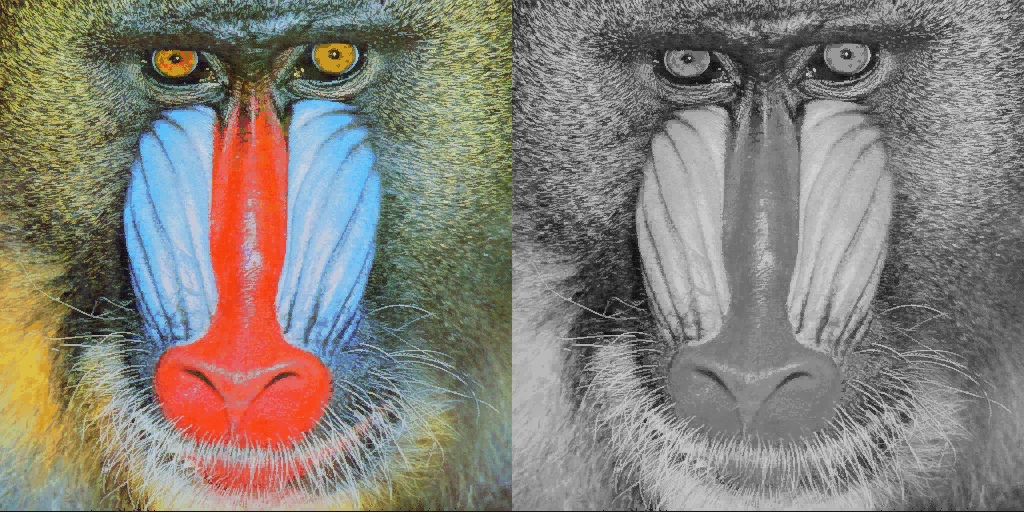

In [46]:
#metode Luminance
mandrill = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
luminance_image = np.zeros((mandrill.shape[0], mandrill.shape[1]), np.uint8)

# Mengakses setiap piksel
for y in range(mandrill.shape[0]):  # Loop melalui setiap baris piksel
    for x in range(mandrill.shape[1]):  # Loop melalui setiap kolom piksel
        b, g, r = mandrill[y, x]  # Mengambil nilai B, G, R dari piksel
        gray_value = 0.299 * r + 0.587 * g + 0.114 * b  # Menghitung nilai luminance
        luminance_image[y, x] = int(gray_value)  # Menyimpan nilai luminance ke gambar output

# Cara simpel tanpa for loop
# luminance_image = cv.cvtColor(mandrill, cv.COLOR_BGR2GRAY)

final_frame = cv.hconcat((mandrill, cv.cvtColor(luminance_image, cv.COLOR_GRAY2BGR)))
cv2_imshow(final_frame)

## Tugas 5: Implementasi transformasi citra dengan pemilihan warna

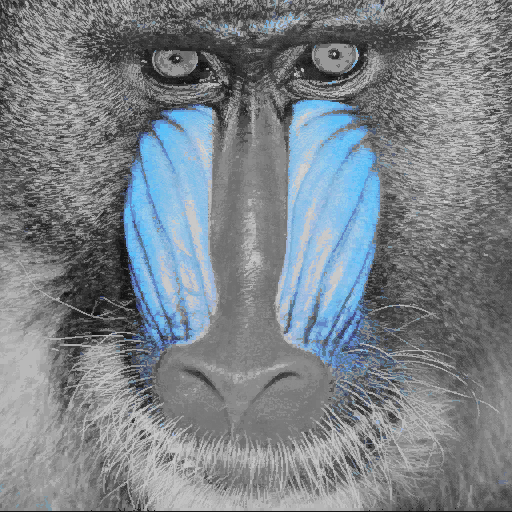

In [57]:
#membaca gambar
mandrill = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
hsv_image = cv.cvtColor(mandrill, cv.COLOR_BGR2HSV)
gray_image = cv.cvtColor(mandrill, cv.COLOR_BGR2GRAY)

#mendefinisikan rentang warna biru dalam ruang warna HSV
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

#membuat mask untuk warna biru
mask = cv.inRange(hsv_image, lower_blue, upper_blue)

#membuat output image, bagian biru tetap berwarna, lainnya grayscale
colored_part = cv.bitwise_and(mandrill, mandrill, mask=mask)  # Hanya bagian yang berwarna biru
gray_part = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)        # Mengubah grayscale menjadi BGR
inverted_mask = cv.bitwise_not(mask)                          # Membuat mask terbalik untuk area non-biru
gray_background = cv.bitwise_and(gray_part, gray_part, mask=inverted_mask)  # Area selain biru diubah jadi grayscale

#gabungkan kedua bagian (biru dan grayscale)
final_image = cv.add(colored_part, gray_background)

#menampilkan hasil
cv2_imshow(result)

